# 1. BERT(Bidirectional Encoder Representations from Transformers) 모델
- 2018년도 google의 [논문](https://arxiv.org/abs/1810.04805)에서 처음 제안한 모델로 Transformer의 인코더 기반의 언어 모델
- [BERT](https://wikidocs.net/109251)는 unlabeled data로 부터 pre-train을 진행한 후, 특정 downstream task에 fine-tuning을 하는 모델
  - downstream task : 주어진 문제나 작업에 특정하게 맞추어진 task를 의미
  - fine-tuning : 사전 학습된 모델을 새로운 작업 또는 데이터셋에 맞게 조정하는 과정
- deep bidirectional을 더욱 강조하여 기존의 모델들과의 차별성을 강조
- 하나의 output layer만을 pre-trained BERT 모델에 추가하여 NLP의 다양한 주요(11개)에서 SOTA를 달성


### 1-1. BERT 모델의 개요
- pre--training 방법은 BERT 이전에도 많이 연구되어 있었고 실제로 좋은 성능
을 내고 있었음
- 문장 뿐만 아니라 토큰 단위의 task에서도 좋은 성능 보였음


### 1.2 BERT 모델의  구조
- Pre-training 와 Fine-tuninig part로 나눠짐
- pre-training에서는 다양한 pre-training tasks 의 unlabeld data를 활용해 파라미터 설정하고 이를 바탕으로 학습된 모델은 F
- BERT base 모델은 OpenAI의 GPT와의 비교를 위해 파라미터 수를 동일하게 만들어 수행

### 1-3. BERT (입/출력)
- 총 3가지(Token,Segment, position)의 Embbedint vector를 합쳐서 input으로 사용
- 모든 input 시퀀스의 첫번쨰 토큰은 GLS과 CLS 토큰과 대응되는 최종 hiddenstate는 분류 모데를 결

input 시퀀스는 항 쌍의 문장으로 구성되고 문방 쌍의 각 문자열로 분리하고 국만중이 A인지 B인지 구분


#### 1-4. BERT의 시간 학습
- MLM(Masked Language Modeling)
  - input tokens의 일정 비율을 마스킹 된 토큰을 예측하는 과정
  - 입력으로 돌아온 단어 토큰 중 일부로[MASK](totem)으로 바꿔서 학습
- NSP(Next Sentece Pedciction)
  - downstream task 두 문장 사이의 연속성을 확인하는데 쓰임
  - 문장 A와 B를 선택할 떄 50%는 실제 A의 다음 문장인 B를 고르고, 나머지 50% 50

# 2. 간단한 답변 랭킹 모델 만들기

https://github.com/songys/Chatbot_data

In [ ]:
import urllib.request
import pandas as pd


In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv', filename='ChatbotData.csv')

('ChatbotData.csv', <http.client.HTTPMessage at 0x7ce60b769600>)

In [ ]:
# 파일 불러오기(데이터 프레임)
# 몇개의 데이터인지 확인

train_dataset = pd.read_csv('ChatbotData.csv')
train_dataset
print(len(train_dataset))



11823


In [ ]:
train_dataset

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [ ]:
train_dataset.replace('', float('nan'), inplace=True)
print(train_dataset.isnull().values.any())

False


In [ ]:
# 중복 제거
train_dataset = train_dataset.drop_duplicates(['Q']).reset_index(drop=True)
print(len(train_dataset))

11662


In [ ]:
train_dataset = train_dataset.drop_duplicates(['A']).reset_index(drop=True)
print(len(train_dataset))

7731


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 질문의 최대 길이와 평균 길이를 hist 로 표현
question_list = list(train_dataset["Q"])
answer_list = list(train_dataset["A"])

print("질문의 최대 길이: ", max(len(question) for question in question_list))
print("질문의 평균 길이: ", sum(map(len, question_list)) / len(question_list))

질문의 최대 길이:  56
질문의 평균 길이:  13.6732634846721


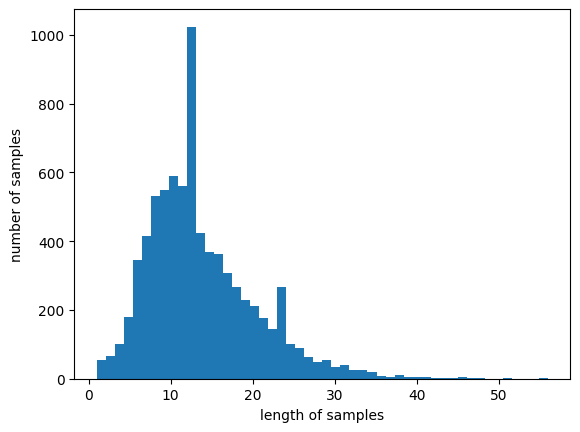

In [ ]:
# 질문의 개수, 답변의 갯수 출력
plt.hist([len(question) for question in question_list],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
print("질문의 최대 길이: ", max(len(answer) for answer in answer_list))
print("질문의 평균 길이: ", sum(map(len, answer_list)) / len(answer_list))

질문의 최대 길이:  76
질문의 평균 길이:  15.611563833915406


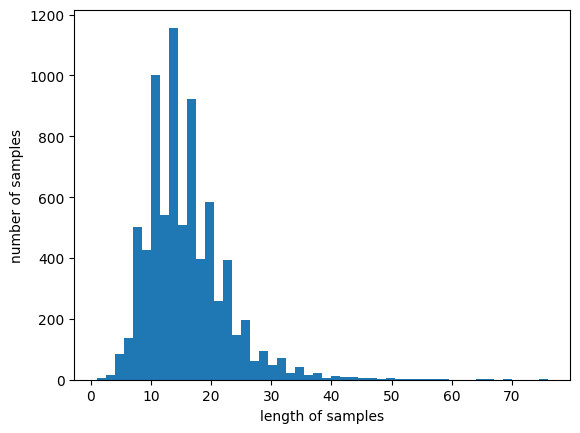

In [ ]:
# 질문의 개수, 답변의 갯수 출력
plt.hist([len(answer) for answer in answer_list],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
import random

In [ ]:
print(f'question 개수:  {len(question_list)}')
print(f'answer 개수: {len(answer_list)}')

question 개수:  7731
answer 개수: 7731


In [ ]:
response_candidates = random.sample(answer_list, 500)

In [ ]:
response_candidates[:10]

['결정은 그대의 몫입니다.',
 '용기를 냈네요.',
 '그가 무엇을 좋아하는지 주변에 물어봐요.',
 '솔직한 편이 더 좋아요.',
 '그 또한 사랑이었을 거예요.',
 '힘든 결정이었을텐데 혼자만의 시간이 필요하겠어요.',
 '좋은 의미를 생각해보세요.',
 '쉬어가도 돼요.',
 '서울에서 왕서방 찾기네요.',
 '바빠서 그럴 수도 있어요. 신경쓰지 않는 연습을 해봐요.']

- KoBERT-Transformer 모델 불러오기
- SKTBrain에서 공개한 한국어 데이터로 사전학습한 BERT 모델
**KoBERT** : https://github.com/SKTBrain/KoBERT
**KoBERT-Transformers**: https://github.com/monologg/KoBERT-Transformers

In [ ]:
!pip install kobert-transformers

In [ ]:
!pip install --force-reinstall transformers==4.20.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from kobert_transformers import get_kobert_model

In [ ]:
model = get_kobert_model()

Downloading:   0%|          | 0.00/426 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352M [00:00<?, ?B/s]

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(8002, 768, padding_idx=1)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
   

In [ ]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(8002, 768, padding_idx=1)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
   

In [ ]:
# 문장에서 토큰들의 인덱스
input_ids = torch.LongTensor([[31, 51 , 99], [15, 5,0]])
# 모델이 어떤 토큰을 무시해야 하는지 나타내는 텐서(0:무시, 1:고려)
attention_mask = torch.LongTensor([[1,1,1],[1,1,0]])
# 다중 문장 입력을 다룰 때 , 각 토큰이 어떤문장에 속하는지를 구분
token_type_ids = torch.LongTensor([[0,0,1], [0,1,0]])
output = model(input_ids, attention_mask, token_type_ids)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.2461,  0.2428,  0.2590,  ..., -0.4861, -0.0731,  0.0756],
         [-0.2478,  0.2420,  0.2552,  ..., -0.4877, -0.0727,  0.0754],
         [-0.2472,  0.2420,  0.2561,  ..., -0.4874, -0.0733,  0.0765]],

        [[ 0.0768, -0.1234,  0.1534,  ..., -0.2518, -0.2571,  0.1602],
         [-0.2419, -0.2821,  0.1962,  ..., -0.0172, -0.2960,  0.3679],
         [ 0.0911, -0.1437,  0.3412,  ...,  0.2526, -0.1780,  0.2619]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.0903, -0.0444,  0.1579,  ...,  0.1010, -0.0819,  0.0529],
        [ 0.0742, -0.0116, -0.6845,  ...,  0.0024, -0.0447,  0.0122]],
       grad_fn=<TanhBackward0>), hidden_states=None, past_key_values=None, attentions=None, cross_attentions=None)

In [ ]:
# Sequence Embeddings:각 토큰의 대한 임베딩, 의미적 표현
# Pooled output : 입력 시퀀스에서 추출한 특징의 요약
# Classification or Regression : 예측
# Hidden State : 모델 내부의 각 레이어에서의 숨겨진 상태값
output[0]

tensor([[[-0.2461,  0.2428,  0.2590,  ..., -0.4861, -0.0731,  0.0756],
         [-0.2478,  0.2420,  0.2552,  ..., -0.4877, -0.0727,  0.0754],
         [-0.2472,  0.2420,  0.2561,  ..., -0.4874, -0.0733,  0.0765]],

        [[ 0.0768, -0.1234,  0.1534,  ..., -0.2518, -0.2571,  0.1602],
         [-0.2419, -0.2821,  0.1962,  ..., -0.0172, -0.2960,  0.3679],
         [ 0.0911, -0.1437,  0.3412,  ...,  0.2526, -0.1780,  0.2619]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
from kobert_transformers import get_tokenizer

In [ ]:
tokenizer = get_tokenizer()

Downloading:   0%|          | 0.00/363k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/76.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'KoBertTokenizer'.


In [ ]:
tokenizer.tokenize('[CLS] 한국어 모델을 공유합니다. [SEP]')

['[CLS]', '▁한국', '어', '▁모델', '을', '▁공유', '합니다', '.', '[SEP]']

In [ ]:
tokenizer.convert_tokens_to_ids(['[CLS]', '▁한국', '어', '▁모델', '을', '▁공유', '합니다', '.', '[SEP]'])

[2, 4958, 6855, 2046, 7088, 1050, 7843, 54, 3]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [ ]:
def get_cls_token(sentence):
  model.eval()
  tokenized_sent = tokenizer(
      sentence,
      return_tensors ='pt',
      truncation=True,
      add_special_tokens=True,
      max_length=128
  )
  input_ids = tokenized_sent['input_ids']
  print(input_ids)
  attention_mask = tokenized_sent['attention_mask']
  print(attention_mask)
  token_type_ids = tokenized_sent['token_type_ids']
  print(token_type_ids)

  with torch.no_grad():
    output = model(input_ids, attention_mask, token_type_ids)

  cls_output = output[1]
  print(cls_output)

  cls_token = cls_output.detach().cpu().numpy()
  return cls_token

In [ ]:
get_cls_token('너 요즘 바뻐?')

In [ ]:
def predict(query,candidates):
  candidates_cls = []

  for cand in candidates:
    cand_cls = get_cls_token(cand)
    candidates_cls.append(cand_cls)


  candidates_cls = np.array(candidates_cls).squeeze(axis=1)

  query_cls = get_cls_token(query)
  similarity_list = cosine_similarity(query_cls, candidates_cls)

  target_dix = np.argmax(similarity_list)
  return candidates[target_idx]

In [ ]:
sample_query = '너 요즘 바뻐?'
get_cls_token(sample_query)

In [ ]:
query = '너 요즘 바뻐?'

sample_ = ['바쁘면 가라', '아니 안바뻐', '오늘은 이만','여성 걸그룹짱']

predicted_answer = predict(sample_query, sample_candidates)
print(f'결과 : {predicted_answer}')

In [ ]:
sample_queery = '힘든 연애 좋은 연애라는게 무슨 차이일까?'
response_candidates = random.sample(answer_list,100)

predicted_answer = predict(sample_query, response_canidates)
print(f'결과 : {predicted_answer}')

In [ ]:
end = 1
while end == 1:
  sentence = input('질문을 입력하세요: ')
  if len(sentence) == 0:
    break
  predicted_answer = predict(sentence, response_canidates)
  print(predicted_answer)
  print('\n')